In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
dir_path = "\\Users\\User\\Desktop"
excel_name = "Asm-g1.xlsx"

In [4]:
excel_path = os.path.join(dir_path, excel_name)

In [5]:
df=pd.read_excel(excel_path)

In [6]:
df

,OrderNumber,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Customer Name,Product,Quantity,Discount Applied,Unit Price,Unit Cost,Total Price,Profit
0,SO - 0001000,2018-07-19,2018-09-13,2018-10-03,2018-10-09,USD,Wuxi Group,Clocks,5,0.150,1286.4,887.616,5467.200,1029.120
1,SO - 0001001,2018-04-10,2018-09-13,2018-09-22,2018-10-02,USD,U.S. Ltd,Bean Bags,6,0.200,174.2,101.036,836.160,229.944
2,SO - 0001002,2018-04-10,2018-09-13,2018-09-24,2018-09-30,USD,Dharma Ltd,Candles,6,0.150,5259.5,4102.410,26823.450,2208.990
3,SO - 0001003,2018-04-10,2018-09-13,2018-10-02,2018-10-08,USD,"Fenwal, Corp",Bean Bags,1,0.400,6512.4,5144.796,3907.440,-1237.356
4,SO - 0001004,2018-04-10,2018-09-13,2018-09-19,2018-09-25,USD,Victory Ltd,Wall Coverings,3,0.075,1701.8,1021.080,4722.495,1659.255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 000995,2018-07-19,2018-09-12,2018-09-17,2018-09-22,USD,Winthrop,Clocks,8,0.100,1098.8,604.340,7911.360,3076.640
7987,SO - 000996,2018-07-19,2018-09-12,2018-09-14,2018-09-24,USD,Ei,Dining Furniture,1,0.075,1273.0,814.720,1177.525,362.805
7988,SO - 000997,2018-04-10,2018-09-12,2018-09-14,2018-09-18,USD,Ole Group,Pillows,5,0.150,268.0,160.800,1139.000,335.000
7989,SO - 000998,2018-04-10,2018-09-13,2018-09-20,2018-09-25,USD,Uriel Group,Vases,8,0.075,3852.5,2157.400,28508.500,11249.300


In [7]:
date_profit=df[["OrderDate","Profit"]].groupby("OrderDate").sum()

In [8]:
date_profit

,Profit
OrderDate,
2018-05-31,18271.1345
2018-06-01,33724.2825
2018-06-02,19631.0670
2018-06-03,62131.6125
2018-06-04,20923.5640
...,...
2020-12-26,19571.9060
2020-12-27,30735.1110
2020-12-28,32801.5920


In [9]:
def line_regres(x_predict,y_known, x_known):
    def avg(array):
        return array.sum()/len(array)
    x_avg = avg(x_known)
    y_avg = avg(y_known)
    b_up= ((x_known-x_avg)*(y_known-y_avg)).sum()
    b_down= ((x_known-x_avg)**2).sum()
    b= b_up/b_down
    a= y_avg-x_avg*b
    y_predict= b*x_predict + a
    return y_predict

In [10]:
def lin_regres(step,in_array):
    out_list=list(in_array[0:step])
    x_array=np.array(range(1,975))
    for i in range(step,974):
        x_predict=x_array[i]
        y_known= in_array[i-step:i]
        x_known = x_array[i-step:i]
        predict=line_regres(x_predict,y_known, x_known)
        in_array=np.append(in_array,predict)
        out_list.append(predict)
    return out_list

In [11]:
input_array=date_profit["Profit"]

In [12]:
pre_list = lin_regres(10,input_array)

In [13]:
pre_list

[18271.134499999996,
 33724.2825,
 19631.067000000003,
 62131.6125,
 20923.564,
 29459.363999999998,
 15100.728,
 26833.031000000006,
 11643.661999999998,
 15178.783000000007,
 15991.638166666664,
 10349.306866666673,
 4930.264233333342,
 5806.034633333344,
 12641.414833333341,
 16392.016766666675,
 20279.164700000005,
 14400.682966666664,
 19178.65843333333,
 20337.762899999994,
 20356.411233333332,
 16672.999133333327,
 9222.724199999993,
 13612.474866666664,
 7596.457766666674,
 9073.387900000002,
 8191.2346333333335,
 5327.310700000002,
 14135.325000000004,
 31475.12153333334,
 32139.0156,
 33634.27023333333,
 29274.747733333334,
 31627.975333333336,
 24187.256833333337,
 26504.981133333342,
 20371.12666666667,
 20367.34563333333,
 17158.903233333338,
 22176.740933333334,
 25910.525866666667,
 19510.52506666666,
 25792.382533333333,
 28421.886866666675,
 25217.736933333334,
 27710.337933333336,
 20430.44176666667,
 20572.05743333333,
 18343.360500000003,
 18823.28596666667,
 23347.

In [14]:
len(pre_list)

974

In [15]:
stt=np.array(range(1,975))
predict_list=pd.DataFrame(stt)
predict_list

,0
0,1
1,2
2,3
3,4
4,5
...,...
969,970
970,971
971,972
972,973


In [16]:
# predict_list.drop("Profit",axis=1,inplace=True)

In [17]:
date_profit["Profit Predict"]=pre_list[:945]

In [18]:
predict_list["Profit Predict"]=pre_list

In [19]:
predict_list.head(30)
predict_list.drop(0,axis=1,inplace=True)

<AxesSubplot:>

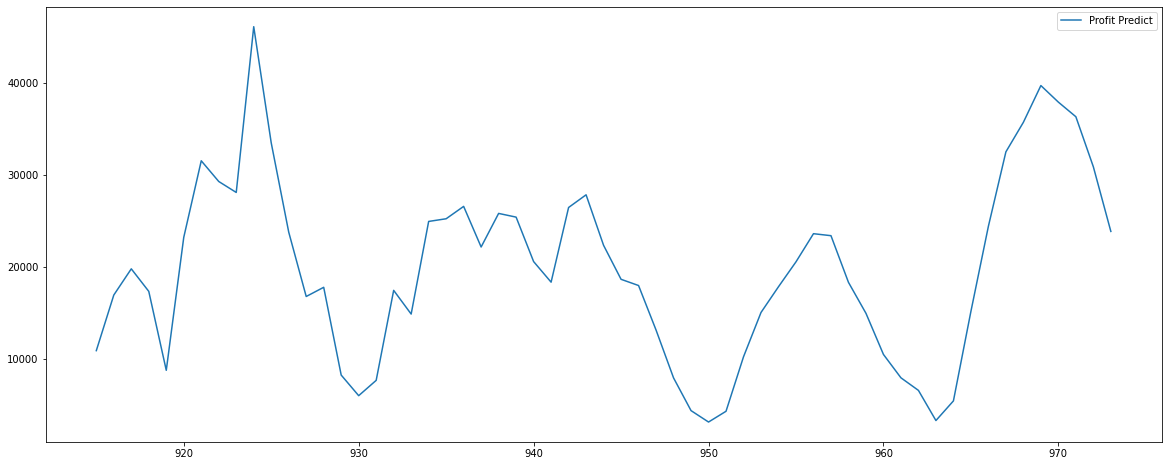

In [20]:
predict_list[915:].plot(figsize=(20,8))

<AxesSubplot:xlabel='OrderDate'>

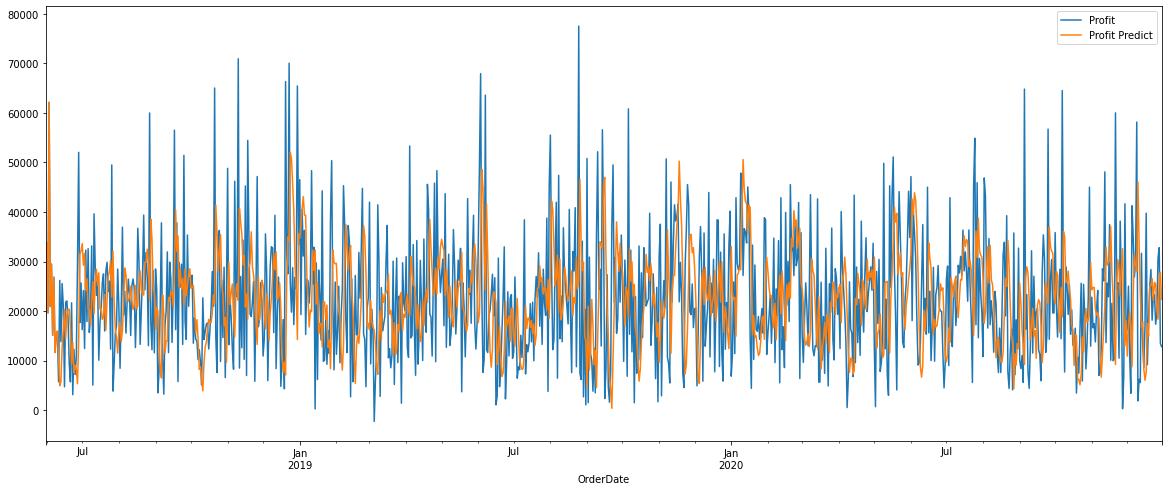

In [21]:
date_profit.plot(figsize=(20,8))

In [22]:
date_profit.head(50)

,Profit,Profit Predict
OrderDate,,
2018-05-31,18271.1345,18271.134500
2018-06-01,33724.2825,33724.282500
2018-06-02,19631.0670,19631.067000
2018-06-03,62131.6125,62131.612500
2018-06-04,20923.5640,20923.564000
2018-06-05,29459.3640,29459.364000
2018-06-06,15100.7280,15100.728000
2018-06-07,26833.0310,26833.031000
2018-06-08,11643.6620,11643.662000


In [23]:
num=np.array(range(0,30))
t_day=pd.DataFrame(num)
t_day

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [24]:
num=np.array(range(0,30))
t_day=pd.DataFrame(num)
t_day
t_day["30days before"]=np.array(predict_list[914:944])

In [25]:
t_day["30days predict"]=np.array(predict_list[944:975])

In [26]:
t_day.drop(0,axis=1,inplace=True)

In [27]:
t_day

,30days before,30days predict
0,18162.554300,22337.458300
1,10909.547467,18648.902833
2,16942.071133,17975.376400
3,19785.770000,13144.463936
4,17339.948400,7954.678627
5,8777.493567,4403.039596
6,23205.791700,3164.065769
7,31509.012367,4331.441460
8,29262.254467,10242.523607
9,28073.460067,15050.337747


<AxesSubplot:>

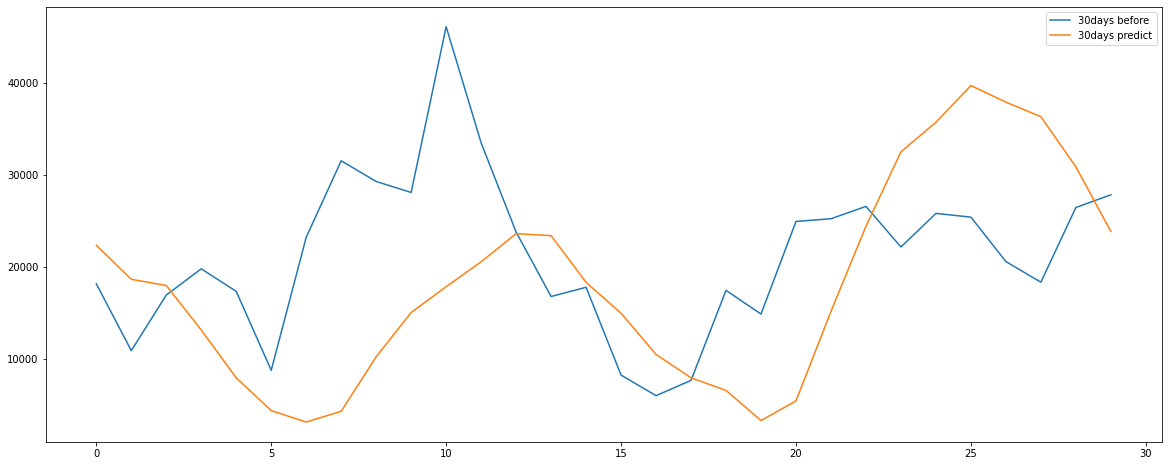

In [28]:
t_day.plot(figsize=(20,8))